In [1]:
from catboost import Pool
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import catboost
from catboost.utils import eval_metric

In [2]:
path = "/Users/thrilok/Desktop/mantra_collab_job/work_files/latest_broko_code"
df = pd.read_csv(path  + "/Dataset/05-10-2023/input/PEEL RES.csv")
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14561 entries, 0 to 14560
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Municipality               14561 non-null  object 
 1   Community                  14561 non-null  object 
 2   ML_Number                  14561 non-null  object 
 3   Type                       14561 non-null  object 
 4   type_det                   14561 non-null  int64  
 5   type_semidet               14561 non-null  int64  
 6   type_det-2                 14561 non-null  int64  
 7   type_att_row_twnhouse      14561 non-null  int64  
 8   style_2_storey             14561 non-null  int64  
 9   style_3_storey             14561 non-null  int64  
 10  style_bungalow             14561 non-null  int64  
 11  style_backsplit_3          14561 non-null  int64  
 12  style_backsplit_4          14561 non-null  int64  
 13  style_backsplit_5          14561 non-null  int

In [ ]:
df_thres = df[df['latest_price'] > 50000]
drop_cols = ["ML_Number","Municipality","Community","Exterior2","Type",
"type_det","type_semidet","type_det-2","type_att_row_twnhouse","Type-2","style_2_storey",
"style_3_storey","style_bungalow","style_backsplit_3","style_backsplit_4","style_backsplit_5","sidesplit_3","sidesplit_4","sidesplit_5","style_other","Style","Lot_Front_Log","Lot_Depth_Log","Tax_Year","Approx_Age","Approx_Square_Footage",
"Approx_Square_Footage_Min","Approx_Square_Footage_Max","Bedroom_Log","Bedroom_SQRT","Bedrooms_","Exterior2","Laundry_Access","Sold_Price",
"lat_hpi","lat_month","his_month","index_hpi","month_str","Sold_Date","washrooms"]#,"Taxes","Bedrooms","Kitchens","main_full","main_half","upeer_full","upper_half","basement_full","basement_half"]
data = df.drop(drop_cols, axis=1)
data.isnull().sum()
data.info(verbose=True,show_counts=True)

In [3]:
df = df[df['Municipality'] == 'Mississauga']

In [4]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5692 entries, 11 to 14560
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Municipality               5692 non-null   object 
 1   Community                  5692 non-null   object 
 2   ML_Number                  5692 non-null   object 
 3   Type                       5692 non-null   object 
 4   type_det                   5692 non-null   int64  
 5   type_semidet               5692 non-null   int64  
 6   type_det-2                 5692 non-null   int64  
 7   type_att_row_twnhouse      5692 non-null   int64  
 8   style_2_storey             5692 non-null   int64  
 9   style_3_storey             5692 non-null   int64  
 10  style_bungalow             5692 non-null   int64  
 11  style_backsplit_3          5692 non-null   int64  
 12  style_backsplit_4          5692 non-null   int64  
 13  style_backsplit_5          5692 non-null   int64  


In [5]:
df = df[df['Community'] == 'lakeview']
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 107 to 14551
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Municipality               309 non-null    object 
 1   Community                  309 non-null    object 
 2   ML_Number                  309 non-null    object 
 3   Type                       309 non-null    object 
 4   type_det                   309 non-null    int64  
 5   type_semidet               309 non-null    int64  
 6   type_det-2                 309 non-null    int64  
 7   type_att_row_twnhouse      309 non-null    int64  
 8   style_2_storey             309 non-null    int64  
 9   style_3_storey             309 non-null    int64  
 10  style_bungalow             309 non-null    int64  
 11  style_backsplit_3          309 non-null    int64  
 12  style_backsplit_4          309 non-null    int64  
 13  style_backsplit_5          309 non-null    int64  


In [6]:
drop_cols = ["ML_Number","Postal_Code","Sold_Price","Month_Year","HPI_for_Month","Community","Municipality","Area"]
# drop_cols = ['ML_Number','Sold_Date',"Address","Area","Postal_Code","Air_Conditioning","Exterior1","Rooms","Tax_Year","Water_Included","property_type"]#,"lat","lng"]
data = df.drop(drop_cols, axis=1)
data.isnull().sum()

KeyError: "['Postal_Code', 'Month_Year', 'HPI_for_Month', 'Area'] not found in axis"

In [ ]:
data = data.dropna(axis = 0, how ='any') 

In [10]:
q1 = data['HPI_Sold_Price'].quantile(0.25)
q3 = data['HPI_Sold_Price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound_outliers = data[data['HPI_Sold_Price'] < lower_bound] 
upper_bound_outliers = data[data['HPI_Sold_Price'] > upper_bound]
# lower_bound_outliers.to_csv(path + '/Dataset/lower_bound_outliers.csv')
# upper_bound_outliers.to_csv(path +'/Dataset/upper_bound_outliers.csv')    
dataset = data[(data['HPI_Sold_Price'] >= lower_bound) & (data['HPI_Sold_Price'] <= upper_bound)]

In [11]:
dataset.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 107104 to 108007
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Postal_Short    340 non-null    object 
 1   Style           340 non-null    object 
 2   Type            340 non-null    object 
 3   Cluster         340 non-null    object 
 4   List_Price      340 non-null    float64
 5   Cluster_Price   340 non-null    float64
 6   Taxes           340 non-null    float64
 7   Cluster_Tax     340 non-null    float64
 8   Bedrooms        340 non-null    float64
 9   Washrooms       340 non-null    float64
 10  Basement1       340 non-null    object 
 11  Days_On_Market  340 non-null    float64
 12  Exterior1       340 non-null    object 
 13  Garage_Type     340 non-null    object 
 14  lat             340 non-null    float64
 15  lng             340 non-null    float64
 16  HPI_Sold_Price  340 non-null    float64
dtypes: float64(10), object(7)
memory

In [12]:

# data.to_csv(path + "/Dataset/residential_10-09-2023.csv",index=False)

In [13]:
X = dataset.drop('HPI_Sold_Price',axis=1)
y = dataset['HPI_Sold_Price']

In [14]:
# numeric features

# numeric_features = [column for column, dtype in X.dtypes.items() if dtype == float or dtype == int]

# categorical features
categorical_features = [column for column, dtype in X.dtypes.items() if dtype==object]

# for c in categorical_features:
#     X[c].fillna('nan', inplace=True)
#     X[c].fillna('nan', inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=42)


cat_train_pool = catboost.Pool(X_train, y_train, cat_features=categorical_features)
cat_val_pool = catboost.Pool(X_valid, y_valid, cat_features=categorical_features)
cat_test_pool = catboost.Pool(X_test, y_test, cat_features=categorical_features)

In [15]:
best_params = pd.read_csv(path + "/Dataset/best_params_87.csv")
best_params

,learning_rate,depth,subsample,colsample_bylevel,min_data_in_leaf,l2_leaf_reg,boosting_type,max_ctr_complexity
0,0.010891,1,0.299522,0.067513,73,7.573544,Ordered,1


In [16]:
# best_params['boosting_type'][0]

In [17]:
params = {
    'learning_rate': best_params['learning_rate'][0],
    'depth':best_params['depth'][0] ,
    'l2_leaf_reg': best_params['l2_leaf_reg'][0],
    'subsample':best_params['subsample'][0],
    'colsample_bylevel':best_params['colsample_bylevel'][0],
    'min_data_in_leaf':best_params['min_data_in_leaf'][0],
    'boosting_type':best_params['boosting_type'][0],
    'max_ctr_complexity': best_params['max_ctr_complexity'][0]
}


model = catboost.CatBoostRegressor(**params, random_seed=42)
model.fit(cat_train_pool,eval_set=cat_val_pool)
y_pred = model.predict(cat_test_pool)
eval_metric(cat_test_pool.get_label(), y_pred, 'MAPE')

0:	learn: 393829.1480349	test: 360281.9118298	best: 360281.9118298 (0)	total: 59.6ms	remaining: 59.6s
1:	learn: 393183.3977296	test: 359567.4458690	best: 359567.4458690 (1)	total: 60.7ms	remaining: 30.3s
2:	learn: 393183.3977125	test: 359567.4643714	best: 359567.4458690 (1)	total: 60.8ms	remaining: 20.2s
3:	learn: 392071.6817930	test: 358646.0575559	best: 358646.0575559 (3)	total: 60.9ms	remaining: 15.2s
4:	learn: 389846.6630234	test: 356598.1031203	best: 356598.1031203 (4)	total: 61.1ms	remaining: 12.2s
5:	learn: 389774.5349957	test: 356521.9776554	best: 356521.9776554 (5)	total: 61.2ms	remaining: 10.1s
6:	learn: 389774.5338699	test: 356522.1219186	best: 356521.9776554 (5)	total: 61.3ms	remaining: 8.7s
7:	learn: 389621.7375080	test: 356378.0036441	best: 356378.0036441 (7)	total: 61.5ms	remaining: 7.62s
8:	learn: 389621.7369393	test: 356378.1060352	best: 356378.0036441 (7)	total: 61.7ms	remaining: 6.79s
9:	learn: 388995.6616419	test: 355685.0974395	best: 355685.0974395 (9)	total: 61.9m

[0.10238582479360563]

In [18]:
model.feature_importances_

array([ 0.12499567,  5.26174925,  0.9464881 ,  0.6294124 , 43.11296456,
        1.65112367, 17.91121652,  1.24009966,  6.12655831, 18.1240495 ,
        0.33312291,  0.4048024 ,  1.63251926,  1.72229819,  0.25238822,
        0.52621138])

In [19]:
for feature,weights in zip(X.columns,model.feature_importances_):
    print(f"{feature} = {weights}")

Postal_Short = 0.12499567200016155
Style = 5.261749246072598
Type = 0.946488102764023
Cluster = 0.6294123950567225
List_Price = 43.11296456155271
Cluster_Price = 1.6511236712138206
Taxes = 17.911216523910433
Cluster_Tax = 1.2400996558449533
Bedrooms = 6.126558306858245
Washrooms = 18.124049504480972
Basement1 = 0.3331229091889255
Days_On_Market = 0.404802400944335
Exterior1 = 1.6325192597825162
Garage_Type = 1.7222981893279183
lat = 0.25238821607782463
lng = 0.5262113849238599


In [20]:
# Calculate the coefficients
coefficients = model.feature_importances_ * best_params['learning_rate'][0]

# Print the coefficients
print('Coefficients:', coefficients)

Coefficients: [0.00136138 0.05730776 0.01030857 0.00685518 0.46956011 0.01798303
 0.19507804 0.01350641 0.06672674 0.19739609 0.00362817 0.00440886
 0.0177804  0.01875822 0.00274886 0.00573117]


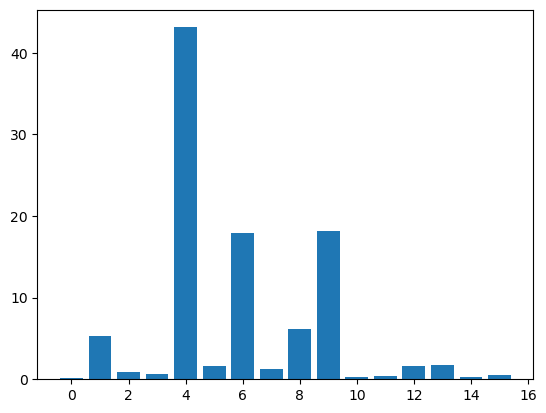

In [21]:
from matplotlib import pyplot

pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [22]:
Acc = (abs(1 - (abs(cat_test_pool.get_label() - y_pred)/cat_test_pool.get_label())) * 100).astype(int)

In [23]:
Acc

array([98, 93, 83, 99, 94, 85, 97, 98, 77, 91, 93, 99, 87, 97, 95, 98, 87,
       81, 86, 89, 95, 97, 98, 78, 88, 91, 87, 81, 82, 97, 91, 88, 85, 98,
       96, 79, 95, 83, 92, 97, 92, 98, 92, 79, 91, 99, 98, 89, 98, 73, 84,
       93, 90, 98, 98, 89, 66, 89, 82, 87, 98, 81, 96, 85, 86, 72, 93, 52])

In [24]:
predictions = X_test
predictions['ML_Number'] = df['ML_Number']
predictions['Month_Year'] = df["Month_Year"]
predictions['HPI_for_Month'] = df["HPI_for_Month"]
predictions['Sold_Price'] = df['Sold_Price']
predictions['HPI_Sold_Price'] = df['HPI_Sold_Price']
predictions['Predicted_HPI_Price']  = y_pred.astype(int)
predictions['Diff']  = abs(predictions['HPI_Sold_Price'] - predictions['Predicted_HPI_Price']).astype(int)
predictions['Accuracy'] = (abs(1 - (abs(predictions['HPI_Sold_Price'] - predictions['Predicted_HPI_Price']))/predictions['HPI_Sold_Price']) * 100).astype(int)
predictions

,Postal_Short,Style,Type,Cluster,List_Price,Cluster_Price,Taxes,Cluster_Tax,Bedrooms,Washrooms,...,lat,lng,ML_Number,Month_Year,HPI_for_Month,Sold_Price,HPI_Sold_Price,Predicted_HPI_Price,Diff,Accuracy
107927,l4y,2-storey,Detached,l4y Detached,2145000.0,1.516658e+06,7075.00,6284.698373,4.0,4.0,...,43.591092,-79.585435,W5611804,May 2022,371.3,2025000.0,1.920832e+06,1940405,19572,98
107737,l4y,1 1/2 storey,Detached,l4y Detached,1229900.0,1.516658e+06,5444.76,6284.698373,4.0,2.0,...,43.591484,-79.580251,W5494547,Feb 2022,392.7,1410000.0,1.264584e+06,1351997,87413,93
107734,l4y,1 1/2 storey,Detached,l4y Detached,1298000.0,1.516658e+06,5436.74,6284.698373,3.0,2.0,...,43.588227,-79.586440,W5545149,Mar 2022,391.9,1700000.0,1.527788e+06,1277166,250621,83
107627,l5g,3 storey,Att/Row/Twnhouse,l5g Att/Row/Twnhouse,1299000.0,1.399150e+06,4432.91,5065.108000,3.0,4.0,...,43.676640,-79.784842,W5504467,Feb 2022,392.7,1480000.0,1.327364e+06,1318699,8665,99
107747,l4y,bungalow,Detached,l4y Detached,1499900.0,1.516658e+06,5492.90,6284.698373,2.0,2.0,...,43.591860,-79.579900,W5704368,Sep 2022,341.5,1400000.0,1.443865e+06,1368857,75008,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107798,l5e,bungalow,Detached,l5e Detached,1049000.0,1.519719e+06,5841.36,5823.038640,3.0,2.0,...,43.572587,-79.566600,W5783730,Oct 2022,337.1,1070000.0,1.117929e+06,1274491,156561,85
107838,l5e,2-storey,Detached,l5e Detached,1989900.0,1.519719e+06,6023.90,5823.038640,3.0,6.0,...,43.571377,-79.567171,W5733610,Sep 2022,341.5,1550000.0,1.598565e+06,1812143,213577,86
107682,l5e,Sidesplit,Detached,l5e Detached,1190000.0,1.519719e+06,4914.74,5823.038640,3.0,2.0,...,43.600792,-79.563571,W5501415,Mar 2022,391.9,1130000.0,1.015529e+06,1296085,280555,72
107687,l5e,bungalow,Detached,l5e Detached,949000.0,1.519719e+06,5019.14,5823.038640,3.0,2.0,...,43.587104,-79.573404,W5434767,Nov 2021,355.5,1220000.0,1.208675e+06,1284287,75611,93


In [25]:
predictions['Accuracy'].sum()/len(predictions['Accuracy'])

89.30882352941177

In [26]:
# # save the dataframe as a csv file
# predictions.to_csv(path + "/Dataset/21-09-2023/Preds_res_cbv2.4_lplakeview.csv",index=False)

In [27]:
# import pickle

# pickle.dump(model, open(path + '/models/catboost.pkl', 'wb'))


In [28]:
# To Load the model

# pickled_model = pickle.load(open('model.pkl', 'rb'))